In [40]:
import os
import sys
import pyemma
import numpy as np
import pandas as pd
from glob import glob
from msmbuilder.cluster import KCenters
from pyemma import config
import matplotlib.pyplot as plt

In [5]:
workdir = '/home/songke/maohua/MY1'
os.chdir(workdir)

trajfiles = sorted(glob('./xtc_meta/*.xtc'))
top = "ref.pdb"

In [12]:
feat = pyemma.coordinates.featurizer(topfile=top)
feat.add_backbone_torsions()
reader = pyemma.coordinates.source(trajfiles[:20], features=feat)
torsions_data = reader.get_output()

Obtaining file info:   0%|          | 0/20 [00:00<?, ?it/s]

getting output of FeatureReader:   0%|          | 0/20 [00:00<?, ?it/s]

In [41]:
def score_cv(data, dim, lag, number_of_splits=5, validation_fraction=0.5):
    """Compute a cross-validated VAMP2 score.

    We randomly split the list of independent trajectories into
    a training and a validation set, compute the VAMP2 score,
    and repeat this process several times.

    Parameters
    ----------
    data : list of numpy.ndarrays
        The input data.
    dim : int
        Number of processes to score; equivalent to the dimension
        after projecting the data with VAMP2.
    lag : int
        Lag time for the VAMP2 scoring.
    number_of_splits : int, optional, default=10
        How often do we repeat the splitting and score calculation.
    validation_fraction : int, optional, default=0.5
        Fraction of trajectories which should go into the validation
        set during a split.
    """
    # we temporarily suppress very short-lived progress bars
    config.show_progress_bars = False
    nval = int(len(data) * validation_fraction)
    scores = np.zeros(number_of_splits)
    for n in range(number_of_splits):
        ival = np.random.choice(len(data), size=nval, replace=False)
        vamp = pyemma.coordinates.vamp(
            [d for i, d in enumerate(data) if i not in ival], lag=lag, dim=dim, scaling="kinetic map")
        scores[n] = vamp.score([d for i, d in enumerate(data) if i in ival])
    config.show_progress_bars = True
    return scores

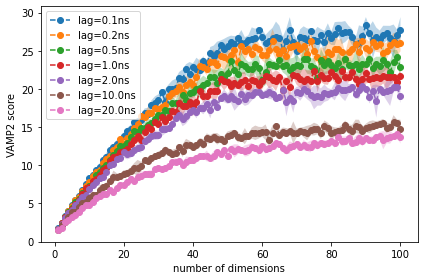

In [43]:
lags = [1, 2, 5, 10, 20, 100,200]
dims = [i + 1 for i in range(100)]
fig, ax = plt.subplots()
for i, lag in enumerate(lags):
    scores_ = np.array([score_cv(torsions_data, dim, lag)
                        for dim in dims])
    scores = np.mean(scores_, axis=1)
    errors = np.std(scores_, axis=1, ddof=1)
    color = 'C{}'.format(i)
    ax.fill_between(dims, scores - errors, scores + errors, alpha=0.3, facecolor=color)
    ax.plot(dims, scores, '--o', color=color, label='lag={:.1f}ns'.format(lag * 0.1))
ax.legend()
ax.set_xlabel('number of dimensions')
ax.set_ylabel('VAMP2 score')
fig.tight_layout()

True

In [26]:
lags = [1]
dims = [i + 1 for i in range(10)]

for i, lag in enumerate(lags):
    scores_ = np.array([score_cv(torsions_data, dim, lag)
                        for dim in dims])

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

calculate covariances:   0%|          | 0/10 [00:00<?, ?it/s]

In [17]:
scores_.shape

(10, 10)

In [27]:
scores_

array([[1.80444836, 1.79432551, 1.82528505, 1.83129713, 1.81229032],
       [2.4365022 , 2.64489982, 2.54612323, 2.55695145, 2.5435042 ],
       [3.27331589, 3.15931671, 3.33757221, 3.03010611, 3.17381102],
       [3.97980248, 3.94246937, 3.9907139 , 4.20692842, 3.91717758],
       [4.97672496, 4.73972922, 4.76150601, 4.74207553, 4.93270293],
       [5.4834653 , 5.61141064, 5.3674327 , 5.25120559, 5.49316119],
       [6.35825592, 6.10827934, 6.47175519, 6.11774333, 6.50051223],
       [7.10669301, 6.85574177, 6.39992353, 6.77888348, 6.67881019],
       [7.2042307 , 7.47559544, 7.49545841, 7.30933635, 7.60882334],
       [8.75034781, 8.42724898, 8.48856705, 8.10479989, 7.92649177]])

In [ ]:
pyemma.msm.